<a href="https://colab.research.google.com/github/smmurdock/Learn-PyTorch/blob/main/01_Data_Processing_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing in PyTorch

In this exercise, you will demonstrate your knowledge of PyTorch, tensors, and data preprocessing using the `torch`  and `torchvision.transforms` modules.
In cases where a variable or function name is provided for you, please do not change that name, as it will break the grading code.

**torchvision** is a library that comes with **PyTorch** and provides tools to:

1. **Load common image datasets** (e.g., CIFAR-10, MNIST)  
2. **Apply image transformations** (e.g., resizing, normalizing, flipping)  
3. **Use pretrained models** (e.g., ResNet, AlexNet)


In [1]:
# DO NOT EDIT THIS CELL
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

## Creating tensors
In the cell below, you will create tensors of different shapes and sizes using tensor creation operations.
If you're unfamiliar with one or more of the operations, reference the [relevant documentation](https://pytorch.org/docs/stable/torch.html#creation-ops).

In [2]:
# Create a 3 x 3 tensor of all zeros
zero_tensor = torch.zeros(3, 3)

# Create a 5 x 5 x 5 tensor of all ones
ones_tensor = torch.ones(5, 5, 5)

# Create a 2 x 4 x 6 x 8 tensor with random values
rand_tensor = torch.rand(2, 4, 6, 8)

In [3]:
# Grading code. Run this cell to test your code!

assert torch.is_tensor(zero_tensor), "Your zero tensor is not a tensor!"
assert zero_tensor.shape == (3, 3), f"Your zero tensor should have shape (3, 3). It has shape {zero_tensor.shape}."
assert torch.sum(zero_tensor) == 0, "Your zero tensor contains nonzero elements!"

assert torch.is_tensor(ones_tensor), "Your ones tensor is not a tensor!"
assert ones_tensor.shape == (5, 5, 5), f"Your ones tensor should have shape (5, 5, 5). It has shape {ones_tensor.shape}."
assert torch.sum(ones_tensor) == 5 * 5 * 5, "Your ones tensor contains non-one elements!"

assert torch.is_tensor(rand_tensor), "Your random tensor is not a tensor!"
assert rand_tensor.shape == (2, 4, 6, 8), f"Your random tensor should have shape (2, 4, 6, 8). It has shape {rand_tensor.shape}."

print("Great work!")

Great work!


## Creating tensors from Data
In the cell below, you will create a tensor with specific values and data type.

Your tensor should be a 4 x 4 matrix that looks like this:

| 0.5  0.5  0.5  0.5 |

| 0.0  0.5  0.5  0.5 |

| 0.0  0.0  0.5  0.5 |

| 0.0  0.0  0.0. 0.5 |

and you should set the `dtype` to a 16-bit floating point type, `float16`.

In [4]:
# Create your data as a list of lists
data = [[0.5, 0.5, 0.5, 0.5],
       [0.0, 0.5, 0.5, 0.5],
       [0.0, 0.0, 0.5, 0.5],
       [0.0, 0.0, 0.0, 0.5]]

# Create your tensor from your data
upper_triangular = torch.tensor(data, dtype=torch.float16)
print(upper_triangular)

tensor([[0.5000, 0.5000, 0.5000, 0.5000],
        [0.0000, 0.5000, 0.5000, 0.5000],
        [0.0000, 0.0000, 0.5000, 0.5000],
        [0.0000, 0.0000, 0.0000, 0.5000]], dtype=torch.float16)


In [5]:
# Grading code. Run this cell to test your code!

assert torch.is_tensor(upper_triangular), "Your upper triangular tensor is not a tensor!"
assert torch.sum(upper_triangular) == 5, "Your upper triangular tensor doesn't appear to have the correct values."
assert upper_triangular.shape == (4, 4), f"Your upper triangular tensor should have shape (4, 4) but has shape {upper_triangular.shape}."
assert upper_triangular.dtype == torch.float16, f"Your upper triangular tensor should have datatype torch.float16, but has datatype {upper_triangular.dtype}."

print("Great work!")

Great work!


## Datasets and DataLoaders
Datasets and DataLoaders are key components for using data within PyTorch.
In the cells below, you will load and visualize images from the CIFAR-10 dataset.

**NOTE:** Make sure that you include the parameter `transform=ToTensor()` in your dataset!

If you get stuck, consult the relevant documentation for [CIFAR-10](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10)
or the [DataLoader class](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)

100%|██████████| 170M/170M [00:04<00:00, 35.0MB/s]


frog


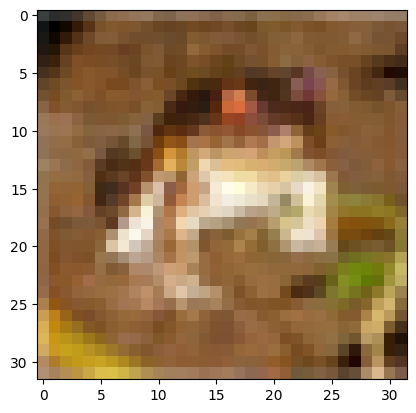

truck


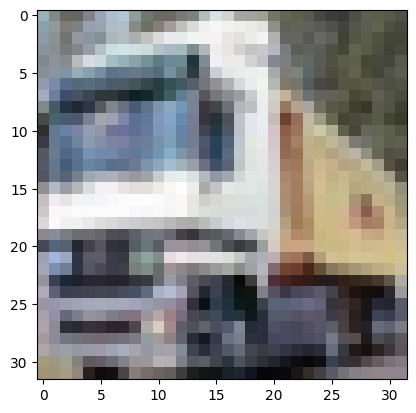

truck


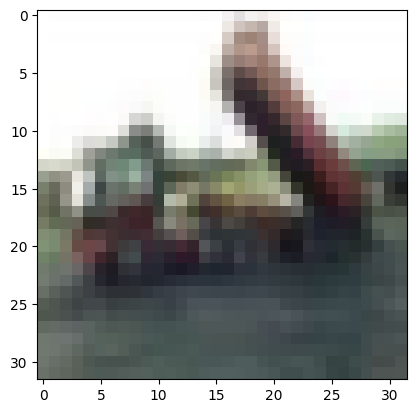

deer


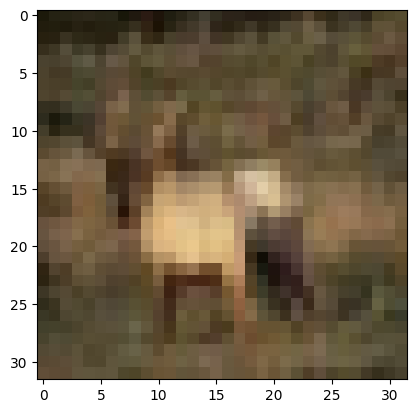

car


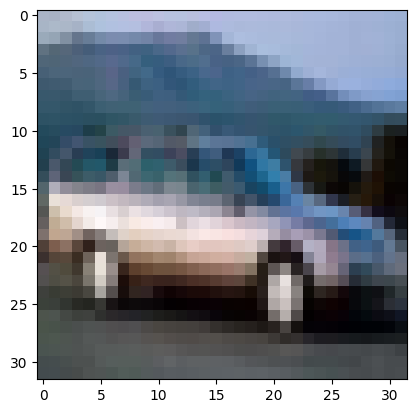

In [6]:
# This function will show us 5 images from our dataloader.
# You may not want to modify this function, or it will not work.
def show5(img_loader):
    # The 10 classes in the dataset
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(classes[labels[i]])

        image = images[i].numpy()
        plt.imshow(image.transpose(1,2,0))
        plt.show()


# Create the training dataset
training_data = datasets.CIFAR10(root='data', train=True, download=True, transform=ToTensor())

# Create the training dataloader with batch size 5
train_loader = DataLoader(training_data, batch_size=5)

# View 5 images using the show5 function
show5(train_loader)

If you can see 5 images above from the classes in CIFAR-10, you're done with this exercise. Great work!